## **H1  Prediction**

Predicting H1 pressure is crucial as it allows for monitoring the pressure produced when the cyclonic separator filter discharges. This measurement serves as an indicator of the filter's efficiency, playing a vital role in upholding the system's overall performance and integrity. Any deviation of H1 pressure from anticipated levels may indicate potential problems in the filtration process, enabling timely maintenance to prevent equipment damage.

## **1. Setting up the dataset repository**

In [1]:
!mkdir data

In [2]:
!unzip data/archive.zip -d data/

Archive:  data/archive.zip
  inflating: data/MetroPT3(AirCompressor).csv  


## **2. EDA**

In [3]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/MetroPT3(AirCompressor).csv')
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [5]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

In [6]:
df.shape

(1516948, 17)

In [7]:
df.describe()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,4.379053e+06,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,0.000000e+00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,7.584735e+06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.137710e+07,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.516947e+07,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


**Plot the boxplot**

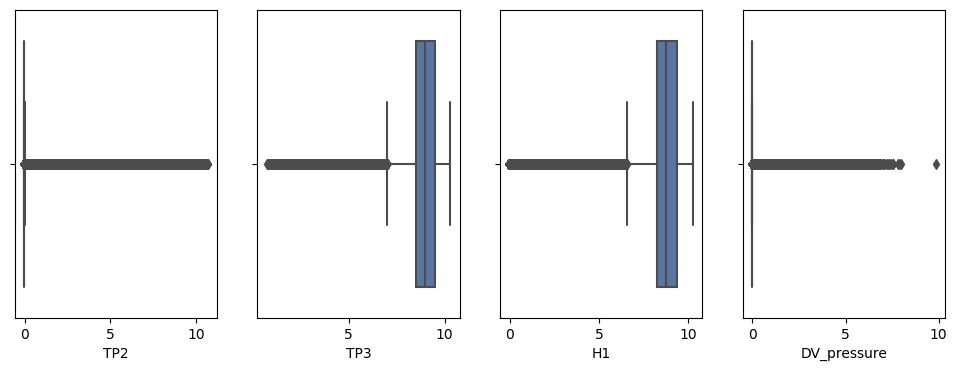

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
sns.set_theme(style="whitegrid")
for axid, col in enumerate(["TP2", "TP3", "H1","DV_pressure"]):
    sns.boxplot(x=df[col], ax=ax[axid])

**REMOVING OUTLIERS**

In [ ]:
# Q1 = df['H1'].quantile(0.25)
# Q3 = df['H1'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df_filtered = df[(df['H1'] >= lower_bound) & (df['H1'] <= upper_bound)]
# df.shape
# df_filtered.shape

(1275621, 17)

**Is there a correlation between H1 and MPG ?**

---



<Axes: xlabel='H1', ylabel='TP3'>

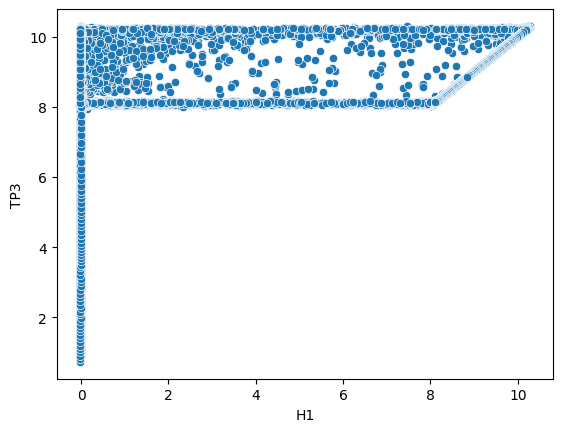

In [ ]:
sns.scatterplot(x=df["H1"], y=df["TP3"])
#"TP3","H1", "Reservoirs", "COMP","DV_eletric", "MPG"

<Axes: xlabel='H1', ylabel='Reservoirs'>

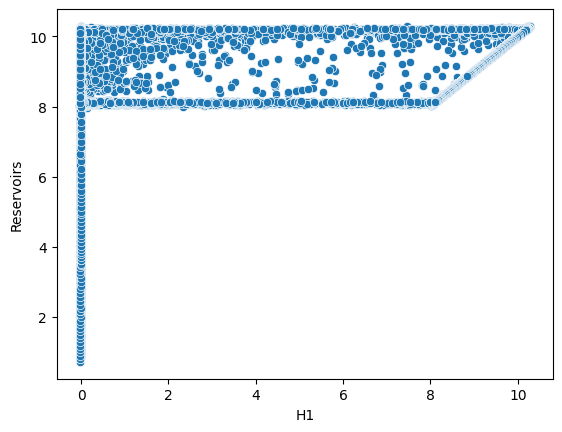

In [ ]:
sns.scatterplot(x=df["H1"], y=df["Reservoirs"])

**Null Values in the dataset?**

In [ ]:
df.isnull().sum()

Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

## **3. Data Transformations**

In [ ]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

In [9]:
from sklearn import preprocessing

**Let us now split the dataset into train-val-test sets.**

In [ ]:
df.head(3)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


**Indexing instances with timestamp (to be used in time series analysis)**

In [ ]:
data_df = df[["TP3","H1", "Reservoirs", "COMP","DV_eletric", "MPG"]]
# data_df['timestamp'] = pd.to_datetime(df['timestamp'])
data_df.loc[:, 'timestamp'] = pd.to_datetime(df['timestamp'])
data_df.set_index('timestamp', inplace=True)
data_df.head()

<ipython-input-13-40170f50112b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.loc[:, 'timestamp'] = pd.to_datetime(df['timestamp'])


,TP3,H1,Reservoirs,COMP,DV_eletric,MPG
timestamp,,,,,,
2020-02-01 00:00:00,9.358,9.340,9.358,1.0,0.0,1.0
2020-02-01 00:00:10,9.348,9.332,9.348,1.0,0.0,1.0
2020-02-01 00:00:19,9.338,9.322,9.338,1.0,0.0,1.0
2020-02-01 00:00:29,9.328,9.312,9.328,1.0,0.0,1.0
2020-02-01 00:00:39,9.318,9.302,9.318,1.0,0.0,1.0


**Heat Map to find Correlation between target variable and other variables**

<Axes: >

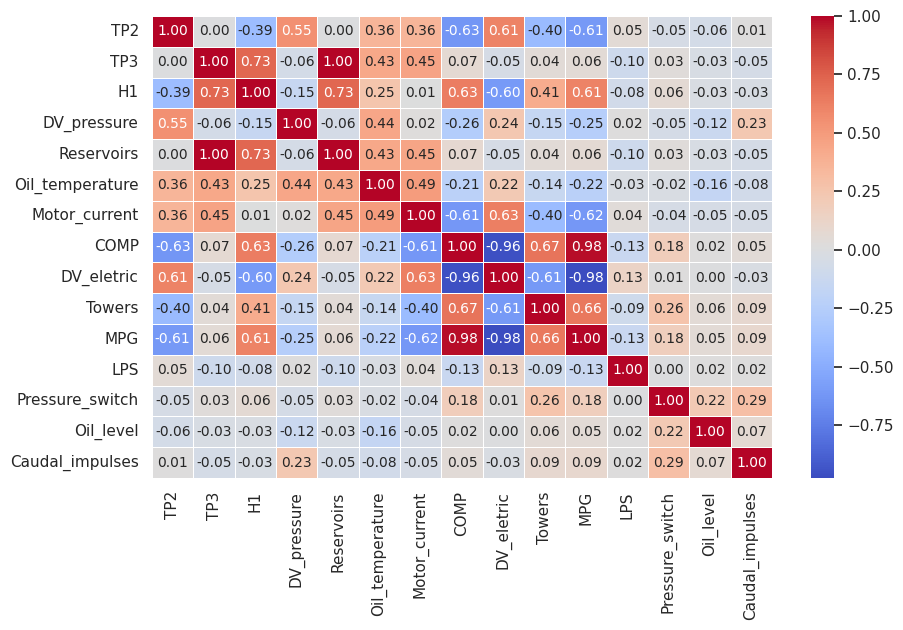

In [ ]:
new_df = df[["TP2", "TP3", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current", "COMP", "DV_eletric", "Towers","MPG","LPS","Pressure_switch","Oil_level","Caudal_impulses"]]
# sns.heatmap(data=new_df.corr(), lw = 1, fmt='.2f', linewidth=0.4,annot_kws={"size": 10}, cmap='coolwarm',ax=ax)
corr_matrix = new_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4, annot_kws={"size": 10}, cmap='coolwarm',ax=ax)

The heat map helps in finding the correlation of target variable with other variables. Through it I found a relatively high correlation between H1 and "TP3", "Reservoirs", "COMP","DV_eletric", "MPG" as compared to other variables so I am going to consider these while predicting the values of H1.

## **4. Data Normalization/Standardization**

In [10]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV

In [ ]:
train,test = train_test_split(data_df, test_size=0.20,shuffle=False)
# Split the data into training and testing sets
#splitting it sequentially

In [ ]:
train

,TP3,H1,Reservoirs,COMP,DV_eletric,MPG
timestamp,,,,,,
2020-02-01 00:00:00,9.358,9.340,9.358,1.0,0.0,1.0
2020-02-01 00:00:10,9.348,9.332,9.348,1.0,0.0,1.0
2020-02-01 00:00:19,9.338,9.322,9.338,1.0,0.0,1.0
2020-02-01 00:00:29,9.328,9.312,9.328,1.0,0.0,1.0
2020-02-01 00:00:39,9.318,9.302,9.318,1.0,0.0,1.0
...,...,...,...,...,...,...
2020-07-20 15:57:54,8.124,-0.022,8.130,0.0,1.0,0.0
2020-07-20 15:58:04,8.182,-0.018,8.184,0.0,1.0,0.0
2020-07-20 15:58:14,8.436,-0.014,8.434,0.0,1.0,0.0


In [ ]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [ ]:
train_scaled

array([[ 0.6033275 ,  0.54554879,  0.60305564,  0.45543461, -0.4497363 ,
         0.46203013],
       [ 0.58775342,  0.54319473,  0.58746352,  0.45543461, -0.4497363 ,
         0.46203013],
       [ 0.57217935,  0.54025217,  0.57187139,  0.45543461, -0.4497363 ,
         0.46203013],
       ...,
       [-0.83260212, -2.20692482, -0.83765671, -2.19570491,  2.2235252 ,
        -2.164361  ],
       [-0.49620212, -2.20633631, -0.49774839, -2.19570491,  2.2235252 ,
        -2.164361  ],
       [-0.18472064, -2.2057478 , -0.19214274, -2.19570491,  2.2235252 ,
        -2.164361  ]])

In [ ]:
test_scaled

array([[ 0.12676084, -2.20515929,  0.11969977, -2.19570491,  2.2235252 ,
        -2.164361  ],
       [ 0.36037194, -2.20515929,  0.35670007, -2.19570491,  2.2235252 ,
        -2.164361  ],
       [ 0.55972009, -2.20457077,  0.55316084, -2.19570491,  2.2235252 ,
        -2.164361  ],
       ...,
       [-0.12553916,  0.40901385, -0.12353739,  0.45543461, -0.4497363 ,
         0.46203013],
       [-0.14734287,  0.40548278, -0.14536636,  0.45543461, -0.4497363 ,
         0.46203013],
       [-0.17226138,  0.40077468, -0.16719534,  0.45543461, -0.4497363 ,
         0.46203013]])

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# **5.Applying a multivariate time series model to predict H1 pressure.[Vector Autoregression] (VAR) model**

In [ ]:
# Fit the VAR model
model = VAR(train_scaled)
results = model.fit(maxlags=50)

In [ ]:
# Forecast the test set
lag_order = results.k_ar
forecast = results.forecast(test_scaled[-lag_order:], len(test_scaled))


In [ ]:
# Inverse transform the forecasts if you used standardization
forecast = scaler.inverse_transform(forecast)


In [ ]:
# Calculate RMSE (Root Mean Squared Error)
rmse_score = np.sqrt(mean_squared_error(test['H1'].iloc[lag_order:], forecast[50:, 0]))


In [ ]:
# Print RMSE
print(f'RMSE: {rmse_score}')


RMSE: 3.220600814137228


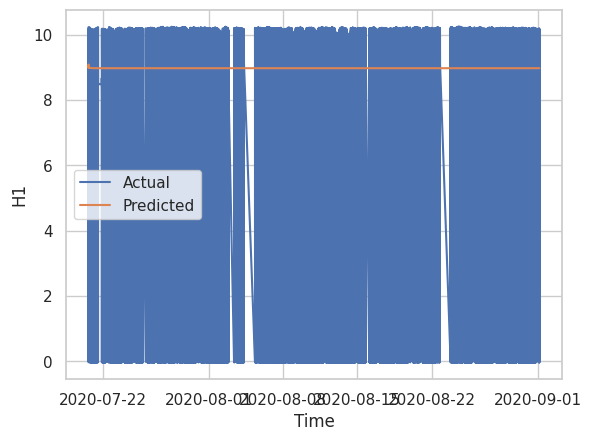

In [ ]:
import matplotlib.pyplot as plt

plt.plot(test.index[lag_order:], test['H1'].iloc[lag_order:], label='Actual')
plt.plot(test.index[lag_order:], forecast[50:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('H1')
plt.legend()
plt.show()


The RMSE of 3.226 for the VAR model indicates a substantial level of prediction error. This suggests that the model is not effectively capturing the underlying patterns in the data, and it performs poorly when applied to new, unseen data. It's important to note that this high error suggests that H1 pressure does not exhibit a significant dependency on time. In other words, using past values of H1 pressure does not provide reliable insights into its future behavior. Instead, it appears that H1 pressure is influenced by other parameters, rather than being time-dependent.

# **6.Modelling H1 using different regression models and finding the best fit model**

In [12]:
from sklearn.tree import DecisionTreeRegressor

model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'DecisionTreeRegressor': {"model": DecisionTreeRegressor(),
                                  "params": {'max_depth': list(range(1, 10))}}
}



In [13]:
new_data_df = df[["TP3","H1", "Reservoirs", "COMP","DV_eletric", "MPG"]]
X_train, X_test, y_train, y_test = train_test_split(new_data_df, df["H1"], test_size=0.20,shuffle=False)

In [14]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((1213558, 6), (303390, 6))

In [26]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_reg_model_ours)
    # plot the prediction errors using the best model
    y_predicted = best_reg_model_ours.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 6.909165870146819e-15 {}
RandomForestRegressor 0.0029108796988067866 {'max_depth': 9, 'n_estimators': 15}
DecisionTreeRegressor 0.0034000675904505544 {'max_depth': 9}
Best model:  LinearRegression()


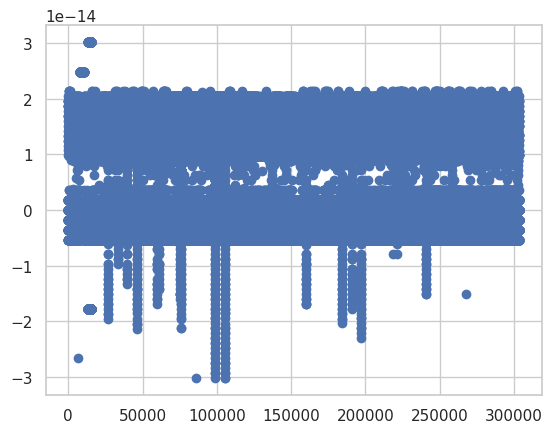

In [27]:
model_results = eval_models()

In [28]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,0.0,0.0,0.0,0.0,{}
RandomForestRegressor,0.002911,0.00285,0.001636,0.001644,"{'max_depth': 9, 'n_estimators': 15}"
DecisionTreeRegressor,0.0034,0.003391,0.002033,0.002085,{'max_depth': 9}


The Linear Regression model demonstrates excellent performance on both the training and testing datasets, characterized by an extraordinarily low Train Root Mean Square Error (Train_RMSE) of approximately 6.91e-15, and a similarly impressive Test_RMSE. This signifies an exceptionally accurate fit. Conversely, the tree-based models exhibit slightly higher RMSE values, indicating a slightly elevated level of error during both training and testing. This confirms the efficacy of the Linear Regression model for this specific dataset, underscoring its robustness and generalization ability.